In [25]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/DCU/CA683 Data')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
listings = pd.read_csv("./listings.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
print(listings.shape)
listings.head(3)

(9437, 106)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20191126102149,2019-11-26,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,...,$0.00,3,60,3,3,60,60,3.0,60.0,yesterday,t,6,27,28,240,2019-11-26,219,40,2011-03-20,2019-11-25,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.07
1,85148,https://www.airbnb.com/rooms/85148,20191126102149,2019-11-26,Habitación en Dublín Double room,NaN,I'm renting a double room in my house in the s...,I'm renting a double room in my house in the s...,none,NaN,NaN,NaN,NaN,NaN,"Sorry, No smoking or pets. Lo siento esta proh...",NaN,NaN,https://a0.muscache.com/im/pictures/583752/61c...,NaN,466111,https://www.airbnb.com/users/show/466111,Don,2011-03-27,"Dublin, Ireland",I am single and live alone here so when I'm ...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/466111/profil...,https://a0.muscache.com/im/users/466111/profil...,Templeogue,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Templeogue, Dublin, Ireland",Templeogue,South Dublin,...,$10.00,1,5,1,1,5,5,1.0,5.0,3 days ago,t,0,0,0,24,2019-11-26,1,1,2019-05-11,2019-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.15
2,85156,https://www.airbnb.com/rooms/85156,20191126102149,2019-11-26,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"Hi , My name is Teresa and we have 3 rooms av...",Our Cottage is a charming light filled cottage...,none,"I love Dundrum and its surrounding areas , The...",We are always prepared to go the extra mile so...,There is a tram service to the city about 10 m...,"Guests have access to the kitchen to make tea,...",We live on site so we are avai

In [0]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 7.6+ MB


In [0]:
listings.isnull().sum().sort_values(ascending=False)

medium_url                      9437
neighbourhood_group_cleansed    9437
xl_picture_url                  9437
host_acceptance_rate            9437
jurisdiction_names              9437
                                ... 
maximum_nights                     0
minimum_minimum_nights             0
maximum_minimum_nights             0
minimum_maximum_nights             0
id                                 0
Length: 106, dtype: int64

In [0]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20191126102149,2019-11-26,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,...,$0.00,3,60,3,3,60,60,3.0,60.0,yesterday,t,6,27,28,240,2019-11-26,219,40,2011-03-20,2019-11-25,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.07
1,85148,https://www.airbnb.com/rooms/85148,20191126102149,2019-11-26,Habitación en Dublín Double room,NaN,I'm renting a double room in my house in the s...,I'm renting a double room in my house in the s...,none,NaN,NaN,NaN,NaN,NaN,"Sorry, No smoking or pets. Lo siento esta proh...",NaN,NaN,https://a0.muscache.com/im/pictures/583752/61c...,NaN,466111,https://www.airbnb.com/users/show/466111,Don,2011-03-27,"Dublin, Ireland",I am single and live alone here so when I'm ...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/466111/profil...,https://a0.muscache.com/im/users/466111/profil...,Templeogue,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Templeogue, Dublin, Ireland",Templeogue,South Dublin,...,$10.00,1,5,1,1,5,5,1.0,5.0,3 days ago,t,0,0,0,24,2019-11-26,1,1,2019-05-11,2019-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.15
2,85156,https://www.airbnb.com/rooms/85156,20191126102149,2019-11-26,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"Hi , My name is Teresa and we have 3 rooms av...",Our Cottage is a charming light filled cottage...,none,"I love Dundrum and its surrounding areas , The...",We are always prepared to go the extra mile so...,There is a tram service to the city about 10 m...,"Guests have access to the kitchen to make tea,...",We live on site so we are avai

In [0]:
listings = listings.loc(axis=1)['price','review_scores_rating','host_since','host_is_superhost','host_has_profile_pic','review_scores_value',
                                'review_scores_location','review_scores_communication','review_scores_checkin','review_scores_cleanliness',
                               'review_scores_accuracy','host_response_rate','host_response_time','square_feet','monthly_price','weekly_price',
                                'host_about','security_deposit','cleaning_fee','experiences_offered']

In [30]:
listings.dtypes

price                           object
review_scores_rating           float64
host_since                      object
host_is_superhost               object
host_has_profile_pic            object
review_scores_value            float64
review_scores_location         float64
review_scores_communication    float64
review_scores_checkin          float64
review_scores_cleanliness      float64
review_scores_accuracy         float64
host_response_rate              object
host_response_time              object
square_feet                    float64
monthly_price                   object
weekly_price                    object
host_about                      object
security_deposit                object
cleaning_fee                    object
experiences_offered             object
dtype: object

In [31]:
listings.head()

,price,review_scores_rating,host_since,host_is_superhost,host_has_profile_pic,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_accuracy,host_response_rate,host_response_time,square_feet,monthly_price,weekly_price,host_about,security_deposit,cleaning_fee,experiences_offered
0,$50.00,95.0,2010-08-06,t,t,10.0,10.0,10.0,10.0,10.0,10.0,100%,within an hour,NaN,NaN,NaN,"I am a friendly outgoing Irishwoman ,who love...",NaN,$10.00,none
1,$30.00,NaN,2011-03-27,f,t,NaN,NaN,NaN,NaN,NaN,NaN,100%,within a few hours,NaN,$700.00,$200.00,I am single and live alone here so when I'm ...,NaN,NaN,none
2,$50.00,96.0,2010-08-06,t,t,10.0,9.0,10.0,10.0,10.0,10.0,100%,within an hour,NaN,NaN,NaN,"I am a friendly outgoing Irishwoman ,who love...",$0.00,$10.00,none
3,$55.00,94.0,2011-05-20,f,t,9.0,9.0,9.0,10.0,9.0,9.0,83%,within a few hours,NaN,NaN,$286.00,I am a well traveled person with lots of cultu...,NaN,NaN,social
4,$29.00,95.0,2011-07-01,f,t,10.0,10.0,10.0,10.0,10.0,10.0,100%,within an hour,NaN,$790.00,$200.00,Used to host students and now I am looking fo...,$0.00,$14.00,none


In [32]:
listings.describe()

,review_scores_rating,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_accuracy,square_feet
count,7846.000000,7832.000000,7835.000000,7839.000000,7832.000000,7838.000000,7836.000000,27.000000
mean,93.221897,9.246170,9.508998,9.747289,9.723825,9.350089,9.625447,443.592593
std,8.202618,0.861452,0.735520,0.638397,0.667546,1.008156,0.759008,634.556917
min,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000
50%,95.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,20.000000
75%,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,678.500000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2500.000000


In [33]:
listings.isnull().sum().sort_values(ascending=False)

square_feet                    9410
monthly_price                  8991
weekly_price                   8780
host_about                     4538
security_deposit               3819
host_response_time             3488
host_response_rate             3488
cleaning_fee                   2551
review_scores_value            1605
review_scores_checkin          1605
review_scores_location         1602
review_scores_accuracy         1601
review_scores_cleanliness      1599
review_scores_communication    1598
review_scores_rating           1591
host_has_profile_pic             10
host_is_superhost                10
host_since                       10
experiences_offered               0
price                             0
dtype: int64

In [0]:
to_drop = ['square_feet','monthly_price','weekly_price','host_response_rate','host_response_time','host_about','security_deposit','cleaning_fee',
           'experiences_offered']
listings.drop(to_drop, inplace=True, axis=1)

In [35]:
listings.isnull().sum().sort_values(ascending=False)

review_scores_checkin          1605
review_scores_value            1605
review_scores_location         1602
review_scores_accuracy         1601
review_scores_cleanliness      1599
review_scores_communication    1598
review_scores_rating           1591
host_has_profile_pic             10
host_is_superhost                10
host_since                       10
price                             0
dtype: int64

In [36]:
listings.head()

,price,review_scores_rating,host_since,host_is_superhost,host_has_profile_pic,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_accuracy
0,$50.00,95.0,2010-08-06,t,t,10.0,10.0,10.0,10.0,10.0,10.0
1,$30.00,NaN,2011-03-27,f,t,NaN,NaN,NaN,NaN,NaN,NaN
2,$50.00,96.0,2010-08-06,t,t,10.0,9.0,10.0,10.0,10.0,10.0
3,$55.00,94.0,2011-05-20,f,t,9.0,9.0,9.0,10.0,9.0,9.0
4,$29.00,95.0,2011-07-01,f,t,10.0,10.0,10.0,10.0,10.0,10.0


In [0]:
listings.dropna(axis=0, how='any', inplace=True)

In [0]:
listings.dtypes

In [0]:
listings['price'] = listings['price'].str.strip('$')

In [0]:
listings['price'] = listings['price'].str.replace(',','')

In [0]:
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [0]:
listings['price'] = pd.to_numeric(listings['price'])

In [0]:
listings.host_since.head()

0   2010-08-06
2   2010-08-06
3   2011-05-20
4   2011-07-01
5   2011-07-04
Name: host_since, dtype: datetime64[ns]

In [0]:
listings.price.head()

0    50.0
2    50.0
3    55.0
4    29.0
5    55.0
Name: price, dtype: float64

In [0]:
listings = listings[listings['price']<=500.0]

C:\Users\mac\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


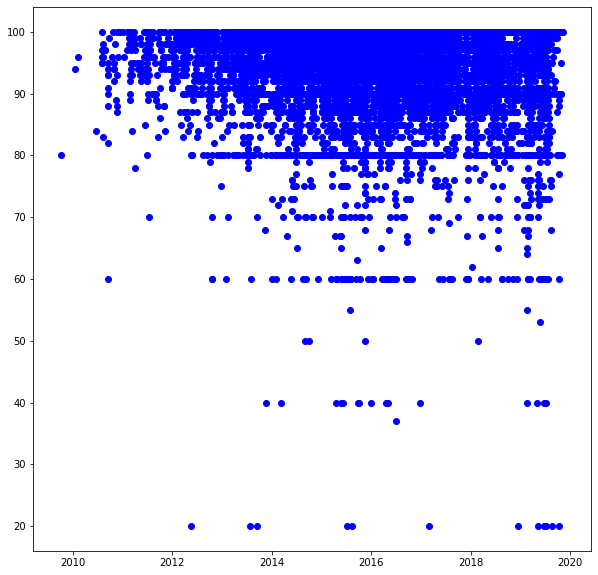

In [0]:
plt.figure(figsize = (10,10))
plt.scatter(listings.host_since, listings.review_scores_rating,color="blue") 
plt.show()

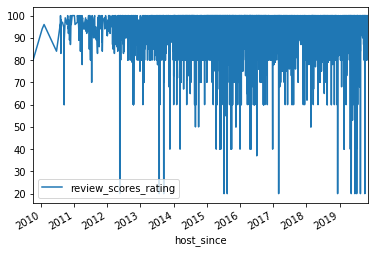

In [0]:
listings.plot('host_since','review_scores_rating')

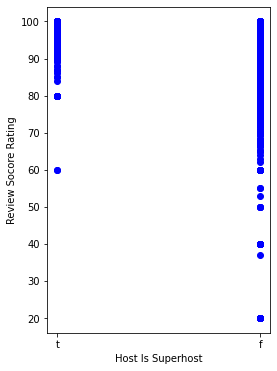

In [0]:
plt.figure(figsize = (4,6))
plt.scatter(listings.host_is_superhost, listings.review_scores_rating,color="blue") 
plt.xlabel("Host Is Superhost")
plt.ylabel("Review Socore Rating")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026CC02BAE48>,
      dtype=object)

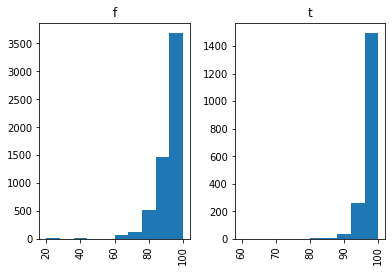

In [0]:
listings.hist('review_scores_rating','host_is_superhost')

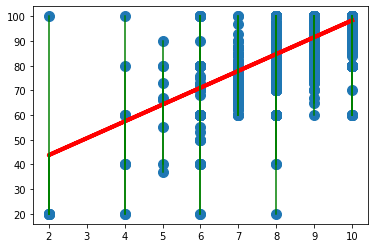

In [0]:
x = listings.review_scores_value
y = listings.review_scores_rating
x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)
plt.scatter(x,y,s=100)
plt.plot(x,pre,"r-",linewidth=4)
for idx, m in enumerate(x):
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')
plt.show()

In [0]:
print(clf.predict([[5.0]]))

[[64.26269577]]


In [0]:
print(u"b", clf.coef_)
print(u"a", clf.intercept_)

b [[6.81805492]]
a [30.17242118]


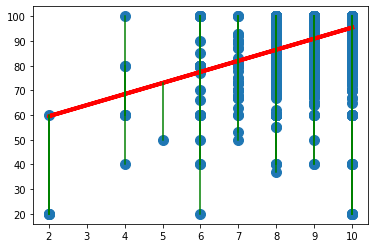

In [0]:
x = listings.review_scores_location
y = listings.review_scores_rating
x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)
plt.scatter(x,y,s=100)
plt.plot(x,pre,"r-",linewidth=4)
for idx, m in enumerate(x):
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')
plt.show()

In [0]:
print(clf.predict([[5.0]]))

[[73.00563639]]


In [0]:
print(u"b", clf.coef_)
print(u"a", clf.intercept_)

b [[4.48786541]]
a [50.56630936]


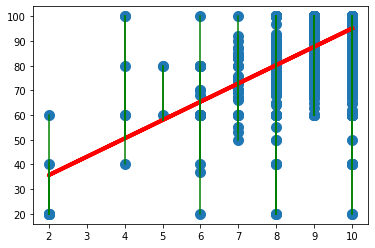

In [0]:
x = listings.review_scores_communication
y = listings.review_scores_rating
x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)
plt.scatter(x,y,s=100)
plt.plot(x,pre,"r-",linewidth=4)
for idx, m in enumerate(x):
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')
plt.show()

In [0]:
print(clf.predict([[5.0]]))

[[57.97475487]]


In [0]:
print(u"b", clf.coef_)
print(u"a", clf.intercept_)

b [[7.42567826]]
a [20.84636357]


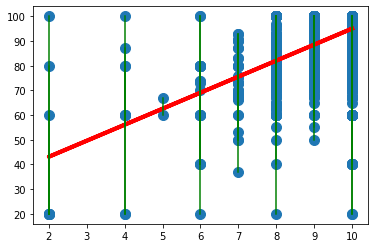

In [0]:
x = listings.review_scores_checkin
y = listings.review_scores_rating
x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)
plt.scatter(x,y,s=100)
plt.plot(x,pre,"r-",linewidth=4)
for idx, m in enumerate(x):
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')
plt.show()

In [0]:
print(clf.predict([[5.0]]))

[[62.58833291]]


In [0]:
print(u"b", clf.coef_)
print(u"a", clf.intercept_)

b [[6.48758859]]
a [30.15038994]


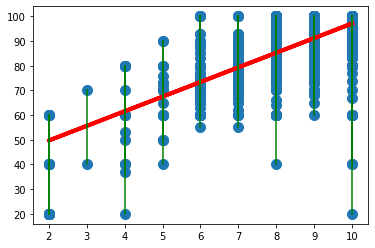

In [0]:
x = listings.review_scores_cleanliness
y = listings.review_scores_rating
x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)
plt.scatter(x,y,s=100)
plt.plot(x,pre,"r-",linewidth=4)
for idx, m in enumerate(x):
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')
plt.show()

In [0]:
print(clf.predict([[5.0]]))

[[67.47721563]]


In [0]:
print(u"b", clf.coef_)
print(u"a", clf.intercept_)

b [[5.92451994]]
a [37.85461595]


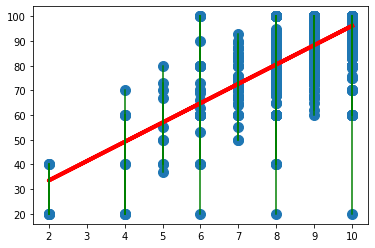

In [0]:
x = listings.review_scores_accuracy
y = listings.review_scores_rating
x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)
plt.scatter(x,y,s=100)
plt.plot(x,pre,"r-",linewidth=4)
for idx, m in enumerate(x):
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')
plt.show()

In [0]:
print(clf.predict([[5.0]]))

[[57.01102275]]


In [0]:
print(u"b", clf.coef_)
print(u"a", clf.intercept_)

b [[7.82674158]]
a [17.87731485]


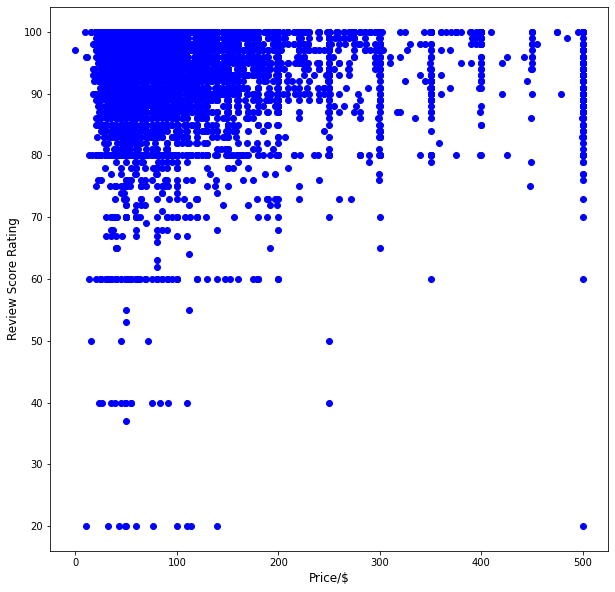

In [0]:
plt.figure(figsize = (10,10))
plt.scatter(listings.price, listings.review_scores_rating,color="blue") 
plt.xlabel("Price/$",fontsize='large')
plt.ylabel("Review Score Rating",fontsize='large')
plt.show()

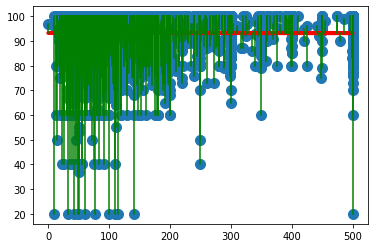

In [0]:
x = listings.price
y = listings.review_scores_rating
x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)
plt.scatter(x,y,s=100)
plt.plot(x,pre,"r-",linewidth=4)
for idx, m in enumerate(x):
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')
plt.show()

In [0]:
print(clf.predict([[200.0]]))

[[93.23150403]]


In [0]:
print(u"b", clf.coef_)
print(u"a", clf.intercept_)

b [[-9.35661722e-05]]
a [93.25021726]
